# Import libraries and upload data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\Property_prices_predictions\V3.csv")
df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,NaN,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,NaN,1.025953,South
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East


# Understanding data

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [99]:
df.describe()

,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate
count,10000.000000,8.771000e+03,1.000000e+04,10000.000000,10000.000000,8718.000000,10000.000000
mean,2015.880100,4.445842e+05,6.224748e+05,3.329600,2.334000,1111.658981,1.143517
std,4.088031,7.513565e+05,1.029709e+06,0.885123,1.209293,305.058455,0.166762
min,2009.000000,0.000000e+00,2.000000e+03,3.000000,1.000000,900.000000,1.003979
25%,2012.000000,1.305250e+05,1.600000e+05,3.000000,1.000000,960.000000,1.023495
50%,2016.000000,2.431800e+05,3.400000e+05,3.000000,2.000000,1021.000000,1.025899
75%,2019.000000,4.418300e+05,6.300000e+05,3.000000,3.000000,1082.000000,1.348259
max,2022.000000,2.111991e+07,2.575000e+07,8.000000,8.000000,2989.000000,1.422308


In [100]:
df.isnull().sum()

Date                    0
Year                    0
Locality             1255
Estimated Value      1229
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1282
property_tax_rate       0
Face                    0
dtype: int64

In [101]:
df.duplicated().sum()

np.int64(0)

- An assessment of missingness revealed that several columns contained null values. Specifically, Locality (1,255 missing values), Estimated Value (1,229), and Carpet Area (1,282) had notable gaps, while all other columns were complete. 
- No duplicate entries were found in the dataset, confirming that each record represents a unique property transaction.

# EDA

In [102]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df[['Date', 'Year', 'Month', 'Quarter']].head()

,Date,Year,Month,Quarter
0,2009-01-02,2009,1,1
1,2009-01-02,2009,1,1
2,2009-01-02,2009,1,1
3,2009-01-02,2009,1,1
4,2009-01-02,2009,1,1


### Univeriate analysis

#### Numeric columns

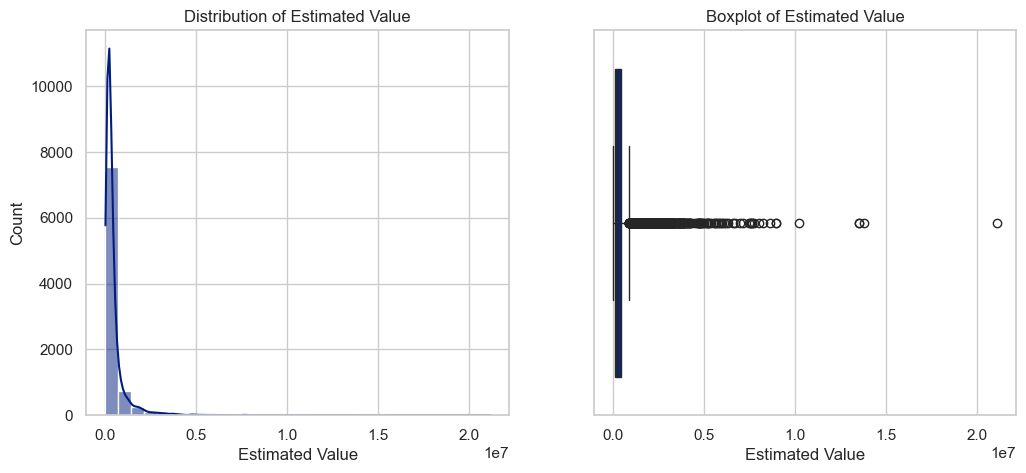

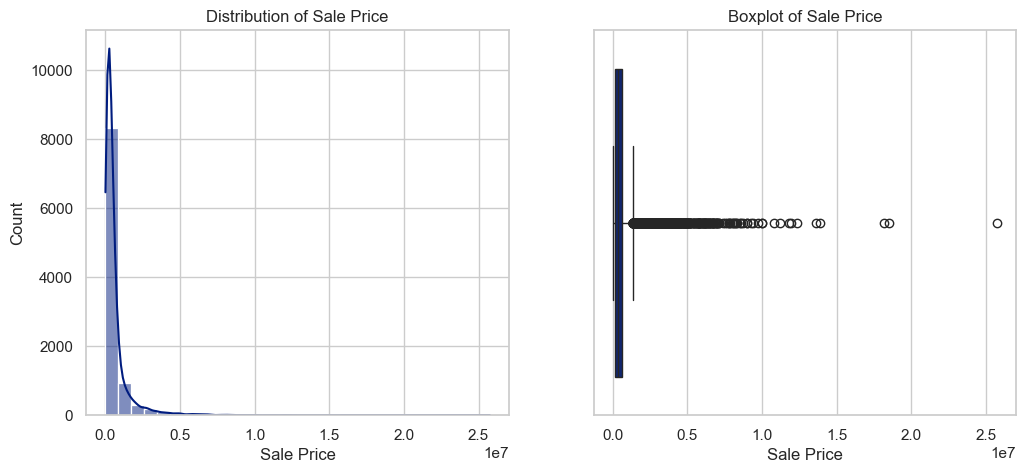

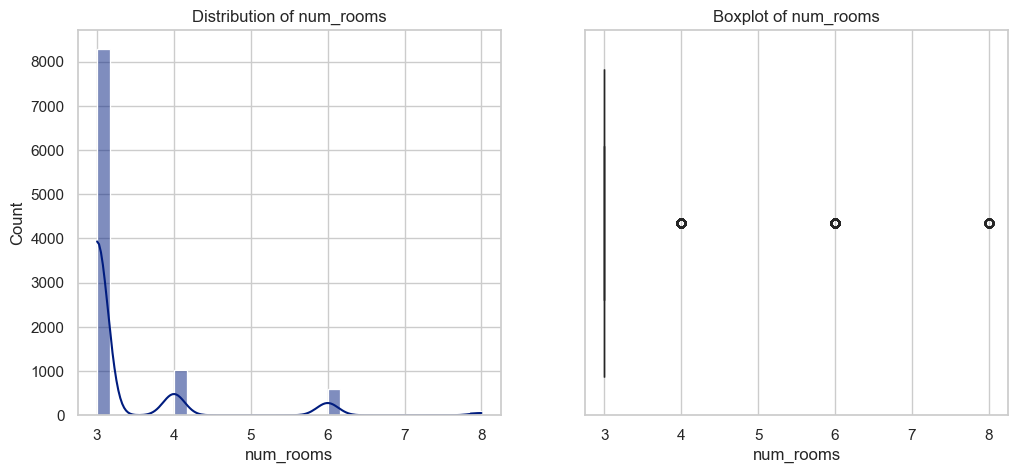

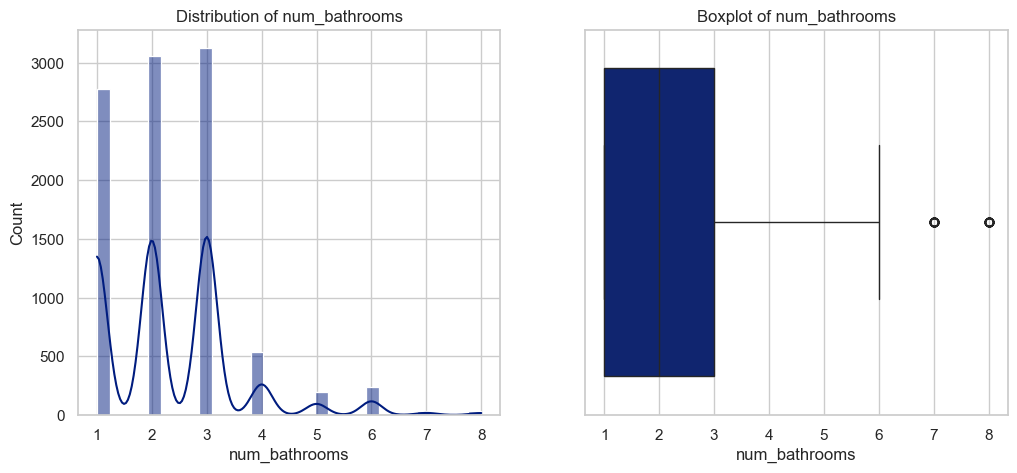

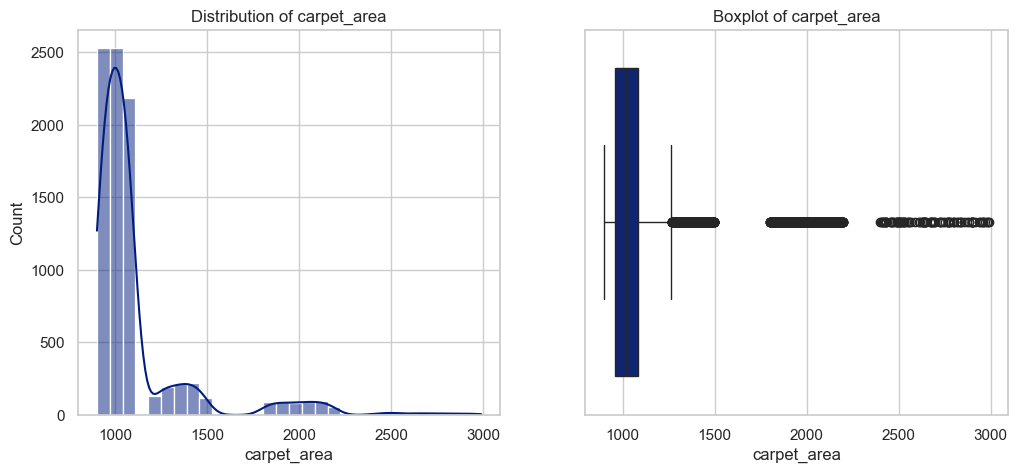

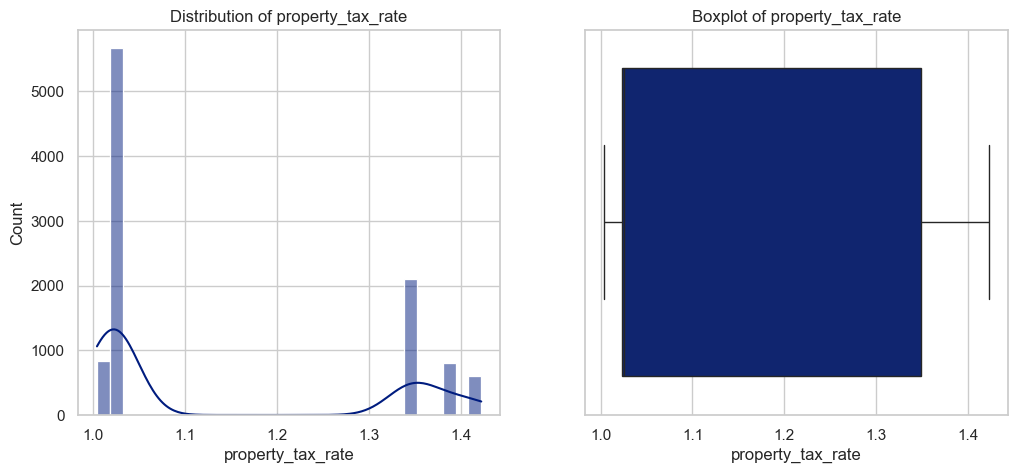

In [103]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

property_tax_rate
- The property_tax_rate exhibits a bimodal distribution, clearly separating into two distinct groups. The majority of the data is concentrated around a value of approximately 1.02 to 1.05, while a secondary, smaller peak occurs around 1.35 to 1.40. The boxplot, though appearing somewhat narrow due to the two clusters, confirms this bimodal nature without showing significant outliers beyond the main groups, suggesting that properties tend to fall into one of two primary tax rate categories.

Estimated Value
- The Estimated Value is highly right-skewed, with the bulk of the estimated values clustered very close to zero, likely representing the lower and moderate value properties. The distribution shows a rapid decrease in frequency as the value increases. The boxplot vividly highlights this skewness and the presence of numerous outliers extending far to the right, indicating a significant number of properties with much higher estimated values compared to the vast majority.

Sale Price
- Similar to the estimated value, the Sale Price distribution is also heavily right-skewed, with the highest concentration of sales occurring at the lower end of the price spectrum. The frequency drops sharply as the sale price increases. The boxplot confirms this pronounced skewness and shows a substantial number of outliers (higher-priced sales) extending far beyond the main interquartile range, suggesting a few high-value transactions.

carpet_area
- The carpet_area distribution is multimodal, displaying several distinct peaks. The largest concentration of areas is around 1000 square units, with other noticeable, smaller peaks near 1400 and 1900 square units, suggesting common sizes or popular property types. The boxplot confirms the high concentration of data in the lower range and shows a large number of potential outliers in the higher-area values, especially above 1500 square units, suggesting properties with notably larger carpet areas.

num_rooms
- The num_rooms variable is concentrated primarily at 3 rooms, showing a strong peak there, followed by smaller, distinct peaks at 4, 6, and 8 rooms. The distribution is highly discrete and heavily weighted towards the lower end. The boxplot's narrow appearance and the presence of outliers at 4, 6, and 8 rooms simply reflect these less-frequent, specific room counts that deviate from the most common count of 3.

num_bathrooms
- The num_bathrooms distribution is multimodal and discrete, with clear, separate peaks at 1, 2, and 3 bathrooms, which are the most common counts. Frequencies drop significantly for higher counts, but distinct, smaller peaks are still visible at 4, 5, 6, 7, and 8 bathrooms, confirming these are also present in the dataset. The boxplot is wide, indicating variability across the lower counts, and shows a few outliers at the highest counts like 7 and 8.

#### Categorical columns

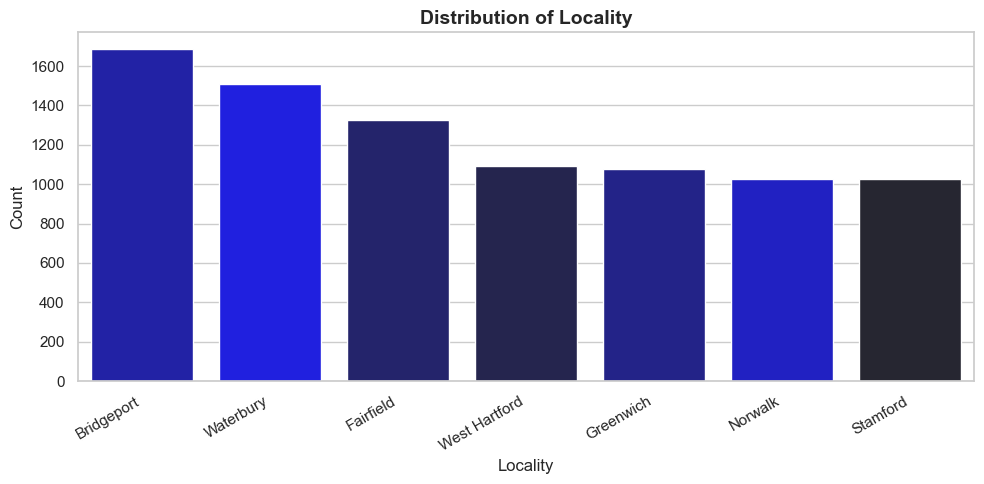

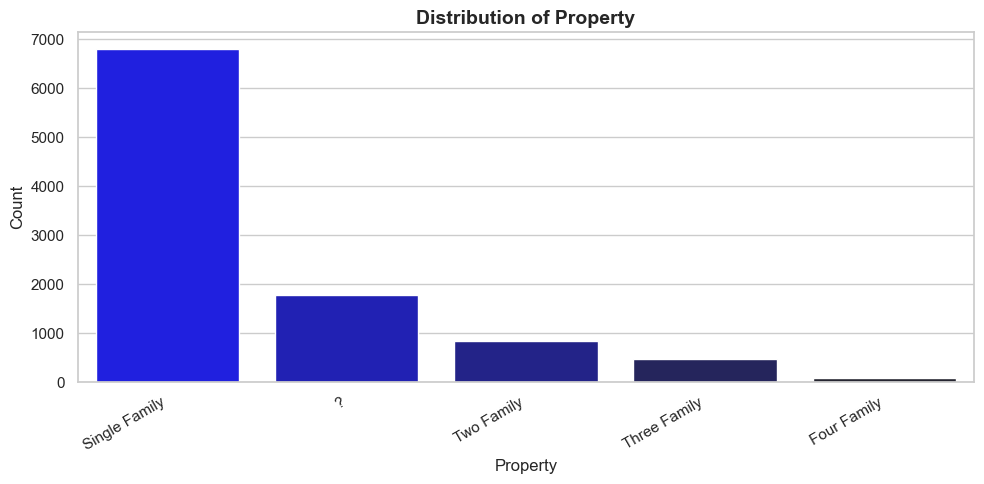

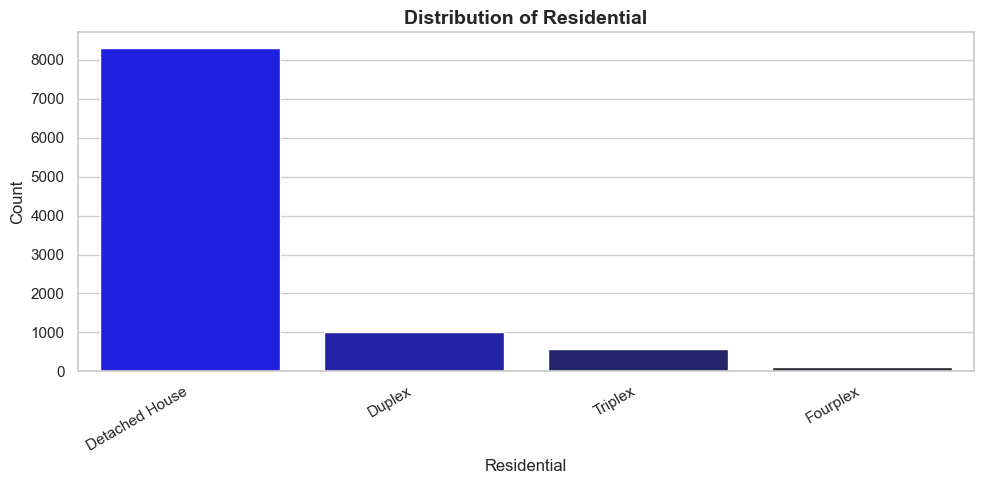

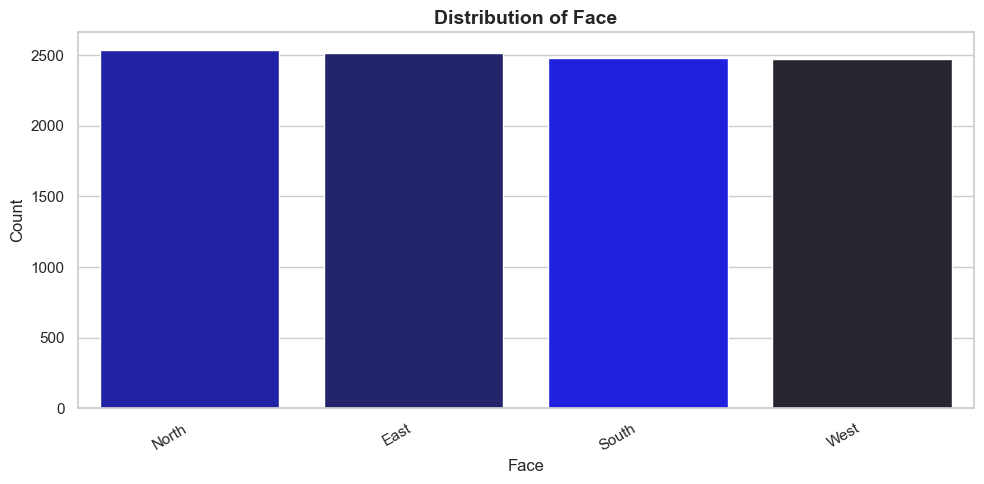

In [104]:
sns.set_theme(style="whitegrid", palette="dark")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, hue=col, order=order, palette="dark:blue_r", legend=False)
    plt.title(f"Distribution of {col}", fontsize=14, weight='bold')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()

Residential
- The Residential type is highly imbalanced, with a massive dominance of Detached Houses. The count for Detached Houses is over 8,000, dwarfing all other categories. Duplex is the second most common, but with a count of less than 1,000, representing a small fraction of the total. Triplex and Fourplex have even smaller, negligible counts. This distribution suggests the dataset is overwhelmingly composed of single-detached homes.

Property
- The Property distribution is heavily skewed towards Single Family properties, which account for nearly 7,000 instances, making it the most frequent category by far. The second-largest category is an unknown ('?') with approximately 1,750 instances. Following this, Two Family properties are present but significantly less common (around 750), while Three Family and Four Family properties are the least frequent, suggesting multi-family homes are a small portion of the dataset.

Locality
- The Locality distribution shows a relatively even spread among the top localities, though Bridgeport is the most frequent with a count of about 1,650. Waterbury is a close second (around 1,500), followed by Fairfield (around 1,300). The remaining major localities—West Hartford, Greenwich, Norwalk, and Stamford—all have similar counts, hovering between 1,000 and 1,150. This indicates that the properties are reasonably distributed across these different localities, with no single location overwhelmingly dominating the others.

Face
- The Face variable exhibits a distribution that is nearly uniform or perfectly balanced. All four categories—North, East, South, and West—have almost identical counts, each sitting just under 2,500 instances. This suggests there is no directional bias in the dataset; properties facing any of the four cardinal directions are equally represented.

### Bivariate analysis

#### Numeric columns

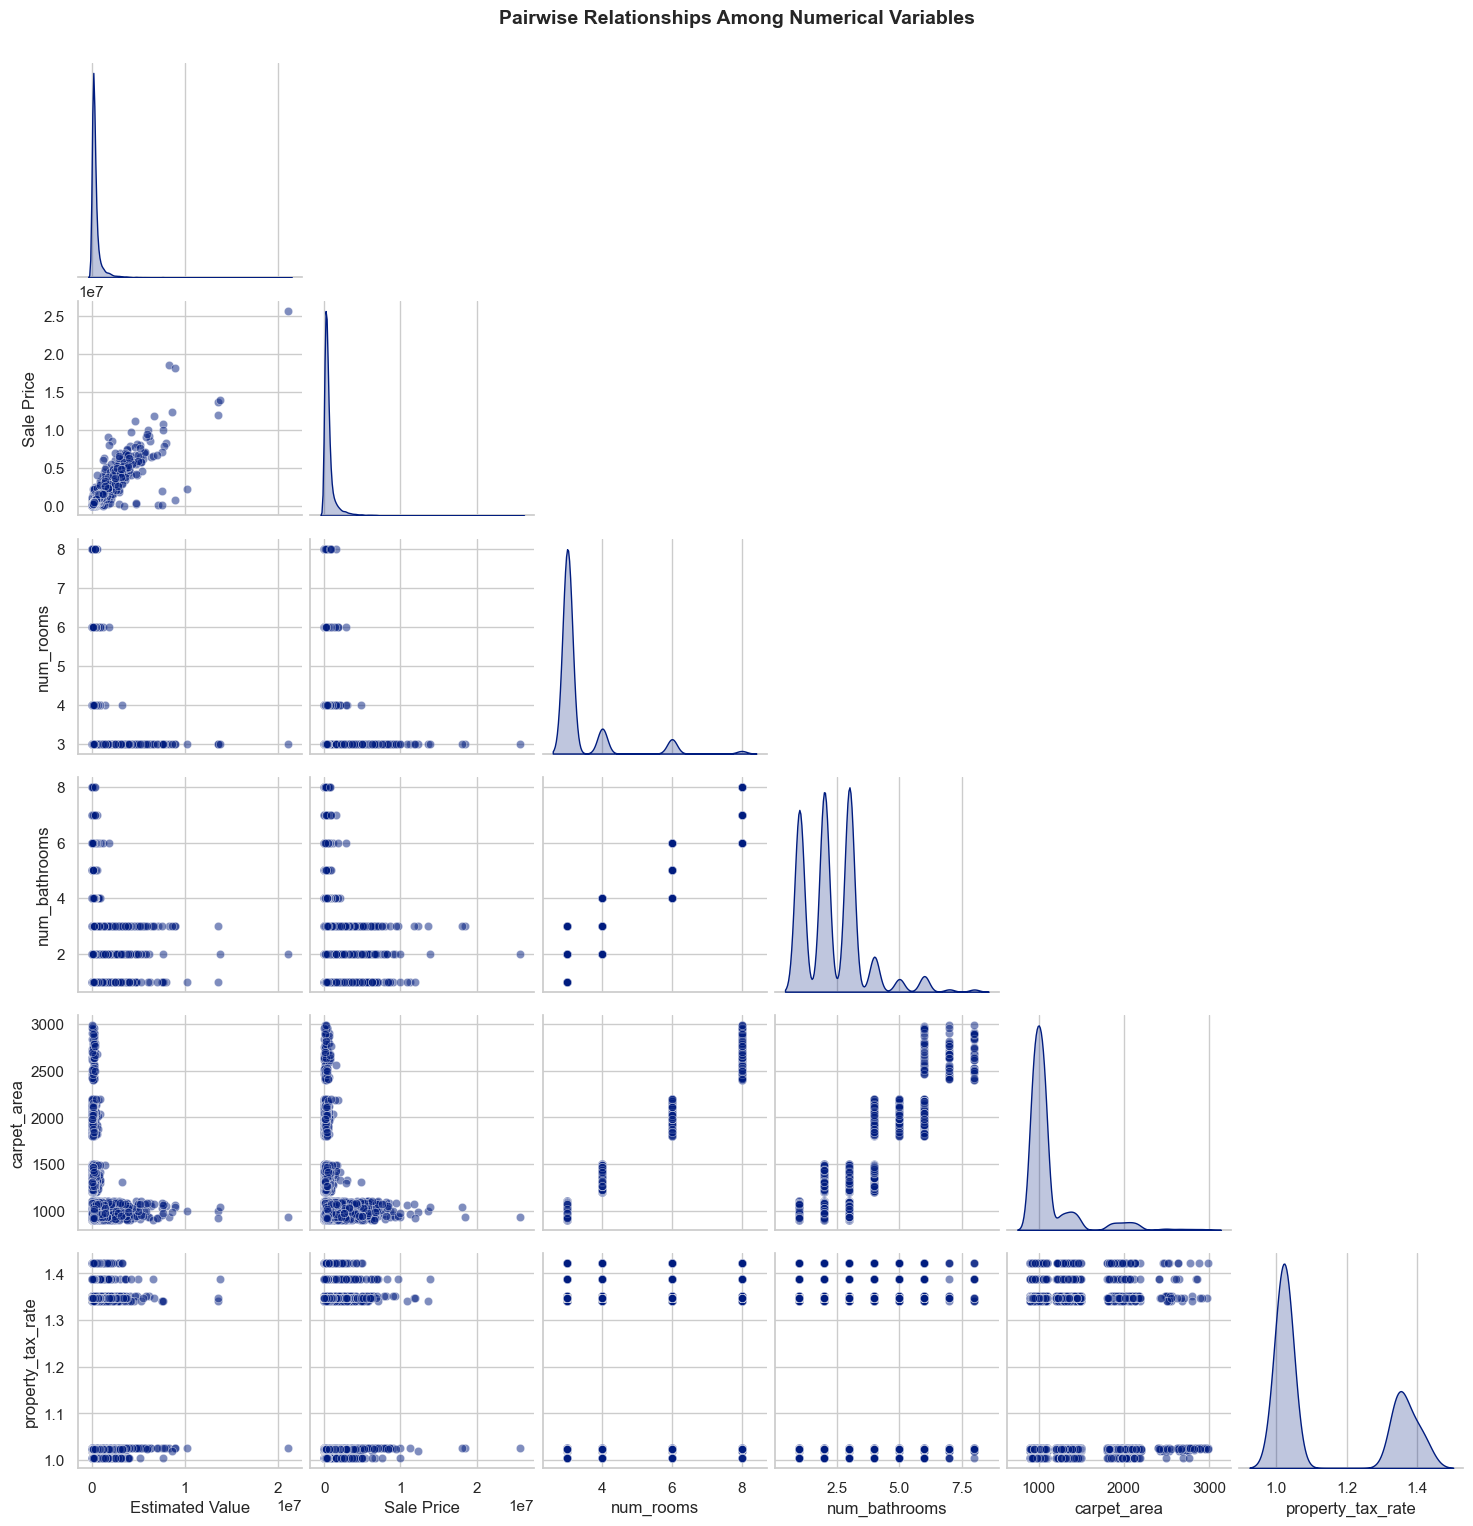

In [105]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Relationships Among Numerical Variables", y=1.02, fontsize=14, weight='bold')
plt.show()

Strong Relationships
- Estimated Value vs. Sale Price: There is a very strong, positive linear relationship between the Estimated Value and Sale Price. As the estimated value increases, the sale price tends to increase proportionally. This indicates that estimated value is a reliable indicator of the final sale price.

Moderate Relationships
- Estimated Value / Sale Price vs. num_rooms, num_bathrooms, carpet_area: All three features show a positive but scattered relationship with both Estimated Value and Sale Price. Higher counts of rooms and bathrooms, and larger carpet areas, generally correspond to higher estimated values and sale prices, but the relationship is not tightly clustered, showing a wide variance in price for a given property size/feature count.
- num_bathrooms vs. num_rooms: A positive correlation is evident, where properties with more rooms tend to have more bathrooms, as expected, though a wide variety of combinations exist.
- carpet_area vs. num_rooms / num_bathrooms: A positive trend exists, properties with larger carpet areas tend to have more rooms and more bathrooms.

Weak/No Apparent Relationships:
- property_tax_rate vs. All Other Variables: The property_tax_rate shows no clear linear correlation with any other variable (Estimated Value, Sale Price, num_rooms, num_bathrooms, or carpet_area). The data points are spread out in distinct horizontal bands due to its bimodal nature, with no increasing or decreasing trend visible against the other property characteristics or values.

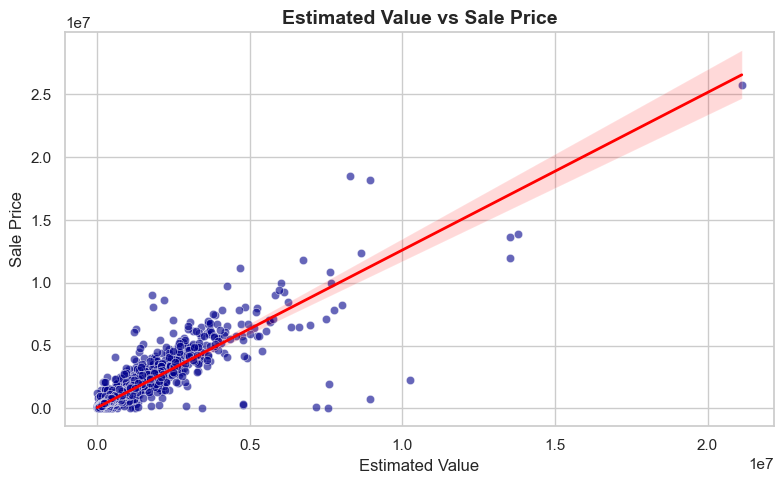

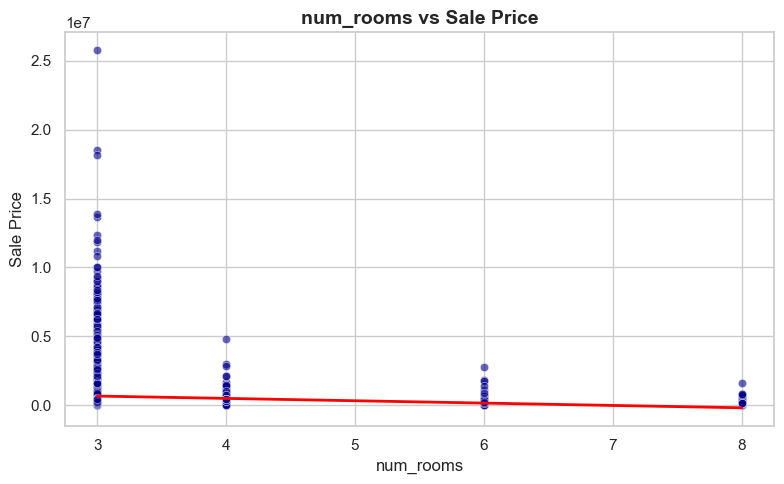

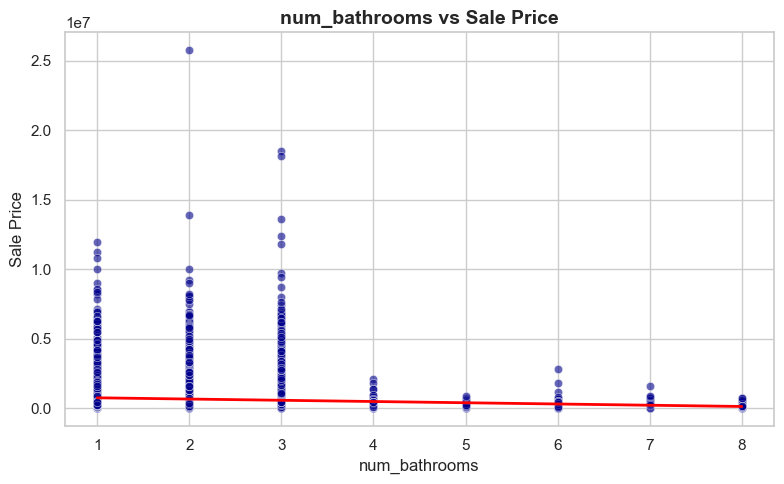

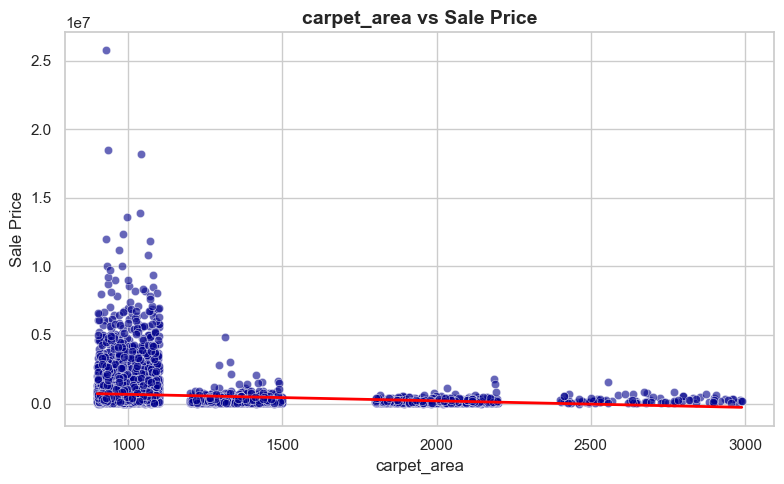

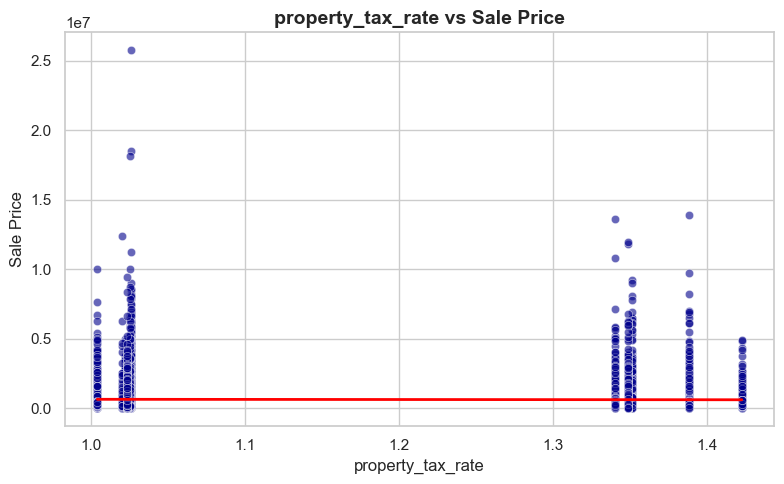

In [106]:
# numeric columns vs target
target = 'Sale Price'
numeric_features = [col for col in numerical_cols if col != target]

for col in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y=target, color='darkblue', alpha=0.6)
    sns.regplot(data=df, x=col, y=target, scatter=False, color='red', line_kws={"lw":2})
    plt.title(f"{col} vs {target}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

Estimated Value vs Sale Price
- The plot of Estimated Value vs. Sale Price shows an extremely strong, positive linear relationship. The data points cluster very tightly around the regression line, which has a high positive slope. This indicates that the Estimated Value is an excellent predictor of the Sale Price, with higher estimated values consistently corresponding to higher sale prices. The tight clustering suggests minimal variance between the property's estimated worth and its final selling price.

carpet_area vs Sale Price
- The relationship between carpet_area and Sale Price is weak and non-linear, though it shows a slight positive trend mainly concentrated at the low end of the carpet area. The vast majority of sales, including the highest-priced outliers, occur in properties with a carpet area below 1500 units. For carpet areas above 1500, the Sale Price generally remains very low and clustered near zero. The fitted regression line is nearly flat, reflecting the overall weak correlation due to the price distribution being highly condensed at the low end.

num_rooms vs Sale Price
- The plot of num_rooms vs. Sale Price shows a distribution where most properties are concentrated at 3 rooms. The highest Sale Price outliers are found in this 3-room category. As the number of rooms increases (to 4, 6, and 8), the frequency of data points and the corresponding Sale Price ranges decrease significantly, with the average price remaining very low across all categories. The regression line is essentially flat, indicating a negligible linear relationship between the number of rooms and the Sale Price.

num_bathrooms vs Sale Price
- Similar to the number of rooms, the relationship between num_bathrooms and Sale Price is weak. Most sales and the highest-priced outliers occur in properties with 1, 2, or 3 bathrooms. Beyond 3 bathrooms, the frequency of properties and the observed Sale Prices drop off dramatically, clustering near zero. The regression line is nearly horizontal, suggesting that the number of bathrooms alone is a poor linear predictor of the Sale Price.

property_tax_rate vs Sale Price
- The plot of property_tax_rate vs. Sale Price highlights the bimodal nature of the tax rate, with two distinct vertical clusters of data centered around the low tax rate (approx. 1.0–1.05) and the high tax rate (approx. 1.35–1.40). High Sale Price properties are present in both tax rate clusters. The regression line is flat, indicating no linear relationship between the property tax rate and the Sale Price. The presence of two distinct tax regimes seems to affect the data distribution but not the linear relationship with price.

#### Categorical columns

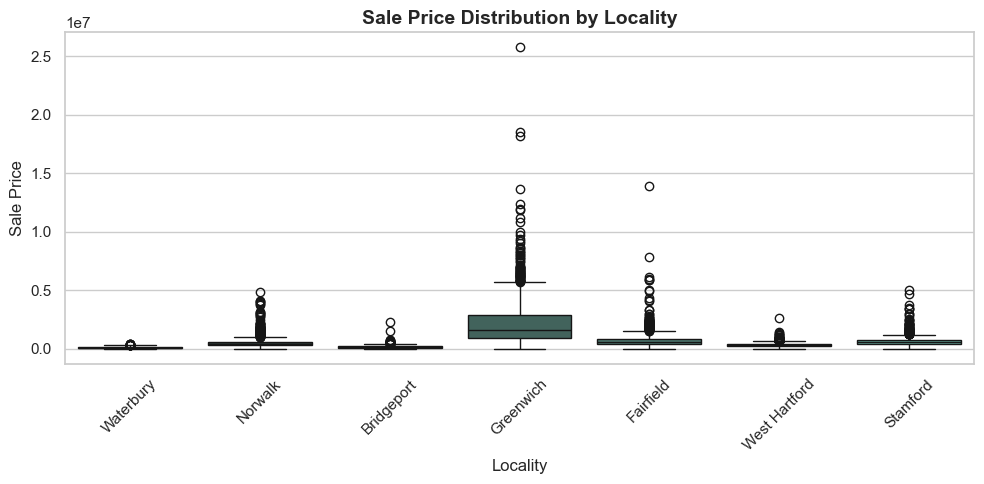

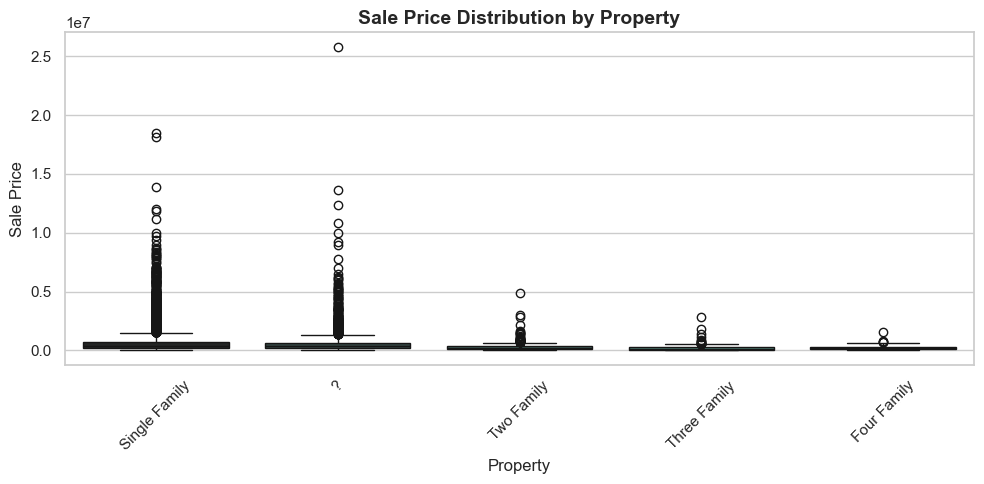

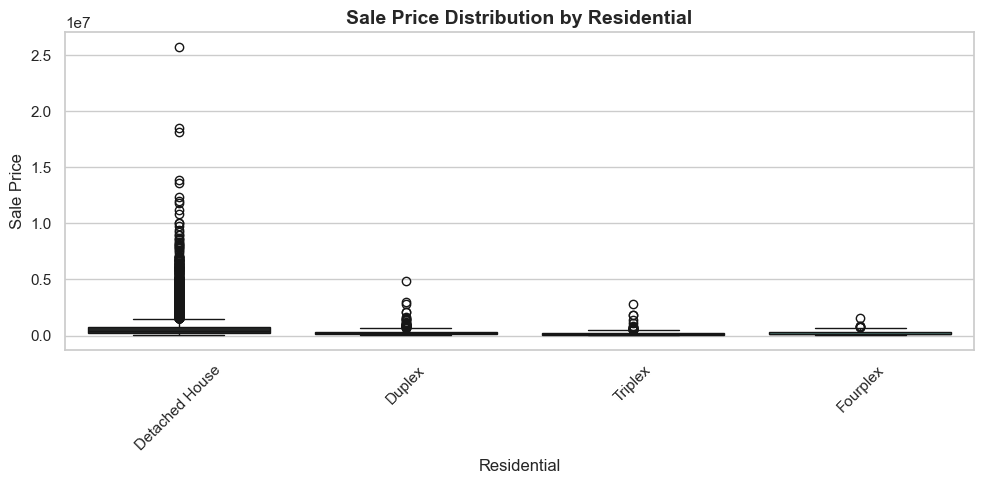

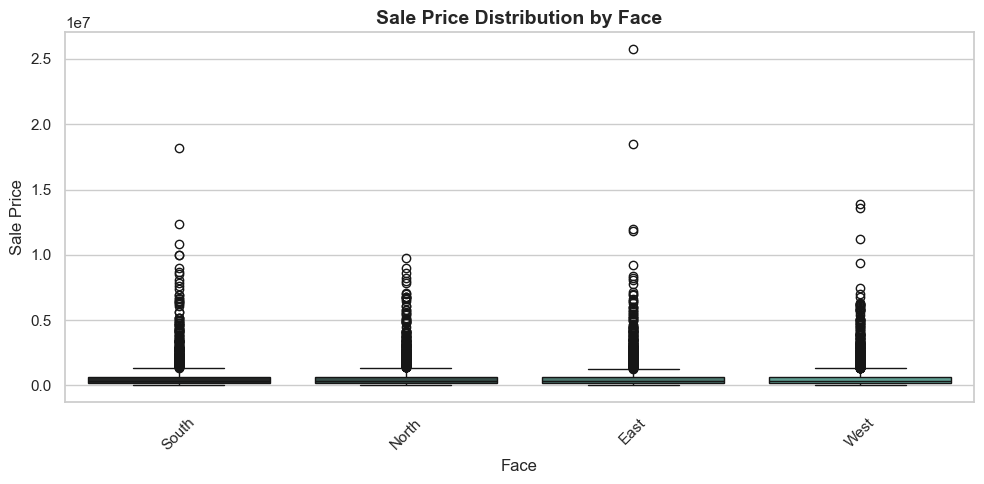

In [107]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

target = 'Sale Price'
for cat in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=cat, y=target, hue=cat, palette='dark:#5A9', legend=False)
    plt.title(f"{target} Distribution by {cat}", fontsize=14, weight='bold')
    plt.xlabel(cat)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Sale Price Distribution by Property
- The distribution of Sale Price by Property type shows that Single Family properties and the unknown (?) category have the widest range of prices and the most extreme high-value outliers (up to $25 million). While the median and interquartile range (IQR) for both Single Family and unknown properties are very low and tightly packed near zero, the presence of numerous, high-magnitude outliers suggests these are where the majority of high-value transactions occur. In contrast, Two Family, Three Family, and Four Family properties have much lower median prices, very narrow IQRs, and far fewer, less extreme outliers, indicating they consistently sell for much lower prices.

Sale Price Distribution by Residential
- The boxplot for Sale Price Distribution by Residential type is dominated by the Detached House category. Detached Houses have the widest spread of prices, a slightly higher median than other types, and contain the most numerous and highest-value outliers (up to $25 million). The other categories—Duplex, Triplex, and Fourplex—all have very low median prices, extremely narrow IQRs clustered near zero, and significantly fewer and less extreme outliers. This confirms that the highest property values and the greatest variability in price are concentrated within the Detached House segment.

Sale Price Distribution by Face
- The distribution of Sale Price by Face (the direction the property faces) shows that the price characteristics are generally consistent across all four directions (North, East, South, West). All categories have very low medians, tightly packed interquartile ranges, and a large number of high-value outliers. Although the most extreme outlier (near $25 million) belongs to the East-facing category, the overall box shape, range, and outlier frequency are remarkably similar across North, East, South, and West. This suggests that the direction a property faces has minimal influence on its Sale Price distribution.

Sale Price Distribution by Locality
- The Sale Price Distribution by Locality shows significant variation. Greenwich clearly stands out with the highest median price and the widest interquartile range (IQR), indicating higher and more variable base prices. Greenwich also contains the single most extreme outlier (near $25 million). Fairfield and Stamford have the next highest medians and IQR spreads. In stark contrast, localities like Waterbury, Norwalk, Bridgeport, and West Hartford have very low medians, IQRs that are tightly clustered near zero, and significantly fewer or less extreme high-value outliers, indicating a much lower overall price distribution in these areas.

### Multivariate analysis

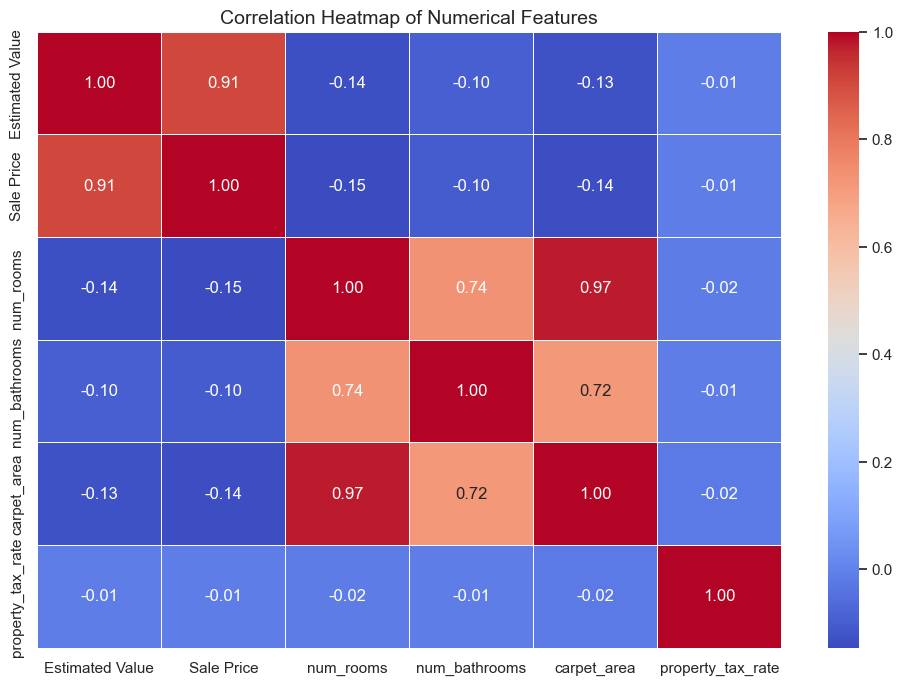

In [108]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

- The most significant positive correlation exists between Estimated Value and Sale Price ($0.91$), which is expected, as a property's estimated worth should closely track its sale price.
- Other notable strong positive correlations are found among the features describing the property's size and structure: num_rooms and carpet_area ($0.97$), num_rooms and num_bathrooms ($0.74$), carpet_area and num_bathrooms ($0.72$). These high values suggest that properties with more rooms tend to have a larger carpet area, and both factors contribute significantly to the number of bathrooms a property has.
- The heatmap reveals that Estimated Value and Sale Price have weak negative correlations with the structural features (number of rooms, bathrooms, and carpet area).
- The property_tax_rate shows extremely weak negative correlations with all other features, suggesting that the tax rate is largely independent of a property's value, sale price, size, or structure within this dataset.

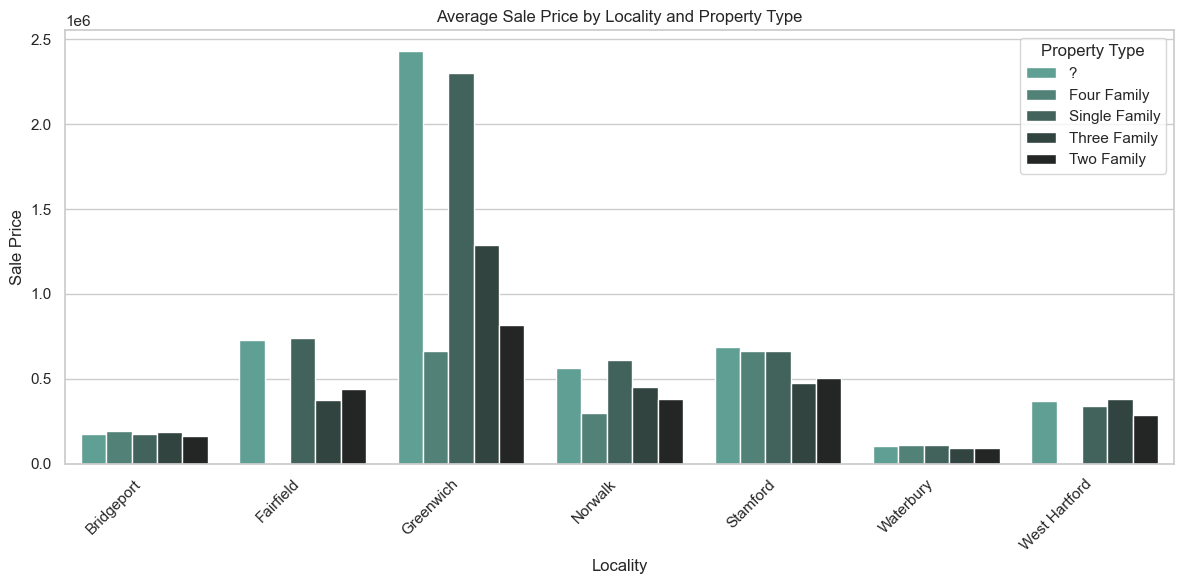

In [109]:
# Average Sale Price by Locality and Property Type
grouped_prices = df.groupby(['Locality', 'Property'])['Sale Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_prices, x='Locality', y='Sale Price', hue='Property', palette='dark:#5A9_r')
plt.title('Average Sale Price by Locality and Property Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

The clustered bar chart reveals significant heterogeneity across both dimensions, with Greenwich being the overwhelmingly most expensive locality. In Greenwich, the average sale prices are highest across almost all property types, with Four Family and Single Family properties leading the way at approximately $\$2.4$ million and $\$2.3$ million, respectively. For all other localities, average sale prices are dramatically lower, typically ranging between $\$150,000$ and $\$750,000$. Fairfield and Stamford represent the next tier of average pricing, while Bridgeport and Waterbury are the lowest. Across most localities, Single Family properties and unknown (?) property types tend to have the highest average prices, while multi-family homes like Two Family, Three Family, and Four Family generally average lower prices in the non-Greenwich areas.

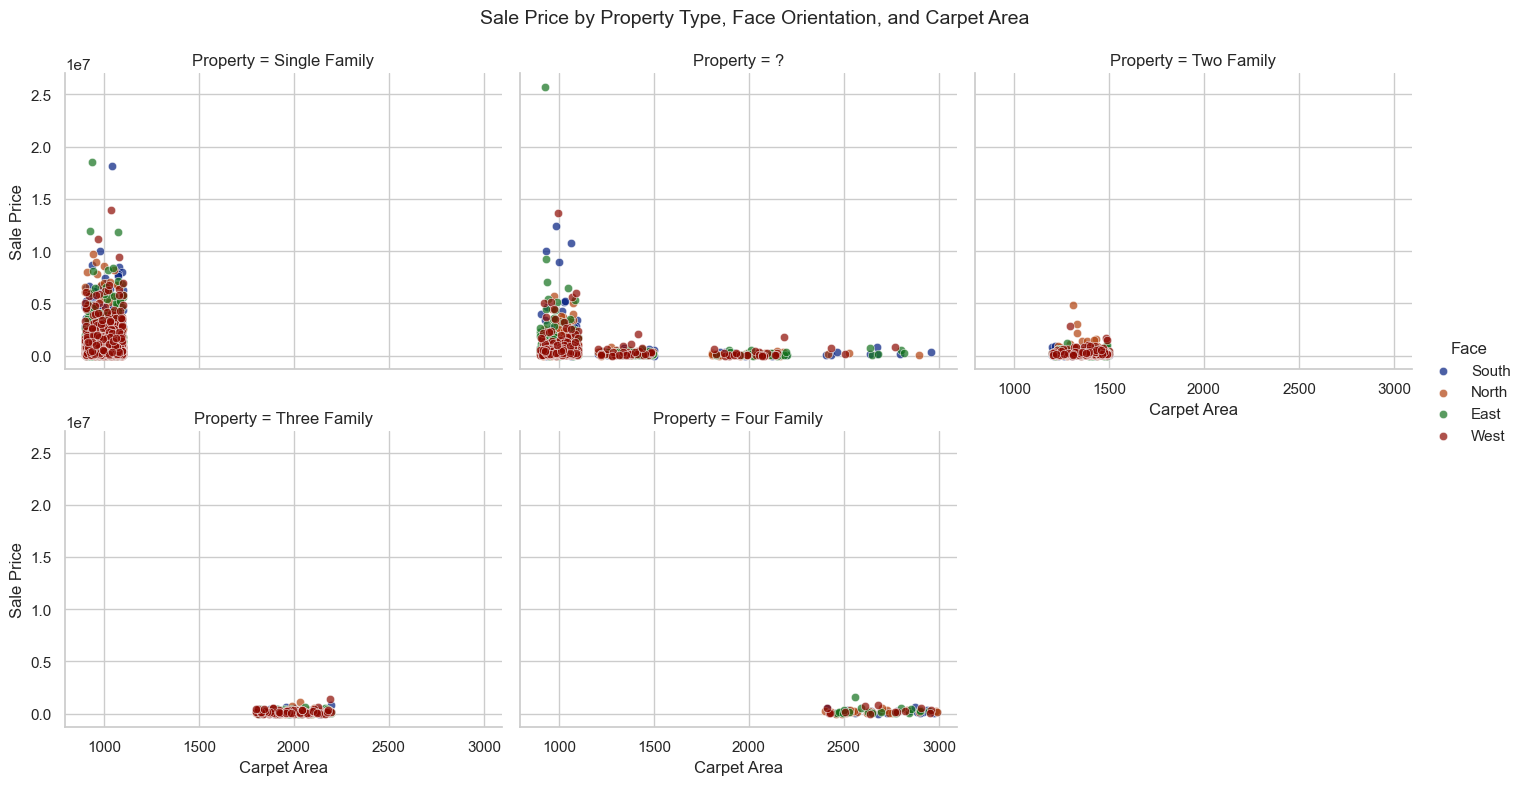

In [110]:
# Sale Price varies across multiple features
g = sns.FacetGrid(df,col='Property',hue='Face',height=4,aspect=1.2,palette='dark',col_wrap=3)
g.map(sns.scatterplot, 'carpet_area', 'Sale Price', alpha=0.7)
g.add_legend()
g.set_axis_labels('Carpet Area', 'Sale Price')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sale Price by Property Type, Face Orientation, and Carpet Area', fontsize=14)
plt.show()

The plot clearly shows that Single Family properties and the unknown (?) category account for nearly all of the high-value outliers (Sale Price above $\$5$ million), with these high prices occurring mostly at the lower end of the Carpet Area range (below 1,500 units). For Two Family, Three Family, and Four Family properties, the Sale Price is clustered very tightly at the low end (below $\$1$ million) regardless of Carpet Area, with the high-end outlier activity being almost non-existent. Furthermore, the color-coding reveals that the Face Orientation (South, North, East, West) is randomly mixed across all property types and prices, confirming its minimal influence on the Sale Price.

### Temporal trends

C:\Users\USER\AppData\Local\Temp\ipykernel_11420\2314062652.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Sale Price', estimator='mean', ci=None, color='teal', linewidth=2.5, marker='o')


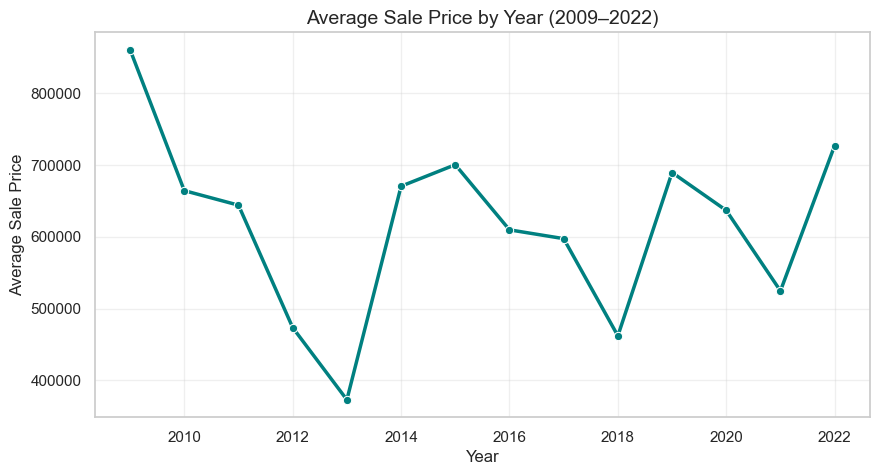

In [111]:
# Average Sale Price per Year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Sale Price', estimator='mean', ci=None, color='teal', linewidth=2.5, marker='o')
plt.title('Average Sale Price by Year (2009–2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.grid(alpha=0.3)
plt.show()

The line plot displays the temporal trend in property values, showing significant volatility over the 14-year period. Starting strong in 2009 (over $\$800,000$), the average price enters a sharp decline, bottoming out in 2013 at its lowest point (below $\$400,000$). Following this trough, the market experiences a period of recovery, with a peak around 2015 (near $\$700,000$), followed by moderate fluctuations and a dip in 2018. The price then shows a general upward trend, culminating in a final high point in 2022 (around $\$730,000$). The plot illustrates a strong initial market correction (2009-2013) followed by a return to, but not surpassing, the initial high values by the end of the period.

C:\Users\USER\AppData\Local\Temp\ipykernel_11420\1674376814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


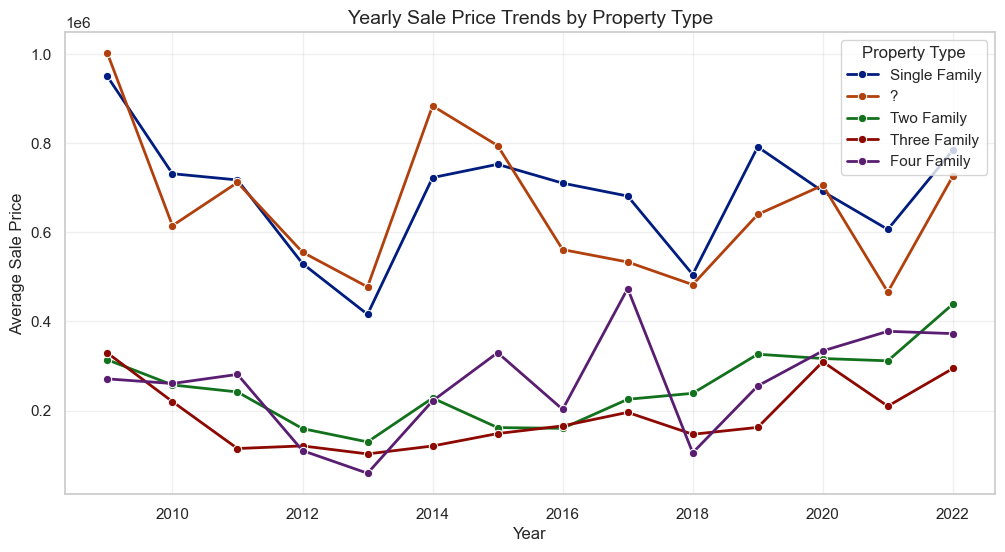

In [112]:
# Sale Price Trend by Property Type
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='Year',
    y='Sale Price',
    hue='Property',
    estimator='mean',
    ci=None,
    linewidth=2,
    marker='o'
)
plt.title('Yearly Sale Price Trends by Property Type', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.legend(title='Property Type')
plt.grid(alpha=0.3)
plt.show()

The line plot shows how the average sale price for different property types has fluctuated between 2009 and 2022. Single Family homes consistently maintained the highest average price, experiencing a peak near $1.0 million in 2009, a trough around 2013, a secondary peak in 2019, and ending near $750,000 in 2022. The unknown (?) property category generally mirrored the Single Family trend but at a slightly lower level. In contrast, all multi-family types (Two Family, Three Family, and Four Family) showed much lower and more stable average prices, mostly fluctuating between $100,000 and $450,000, and did not experience the same extreme volatility as the Single Family market, emphasizing a distinct separation in market dynamics based on property type.

C:\Users\USER\AppData\Local\Temp\ipykernel_11420\4185947999.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


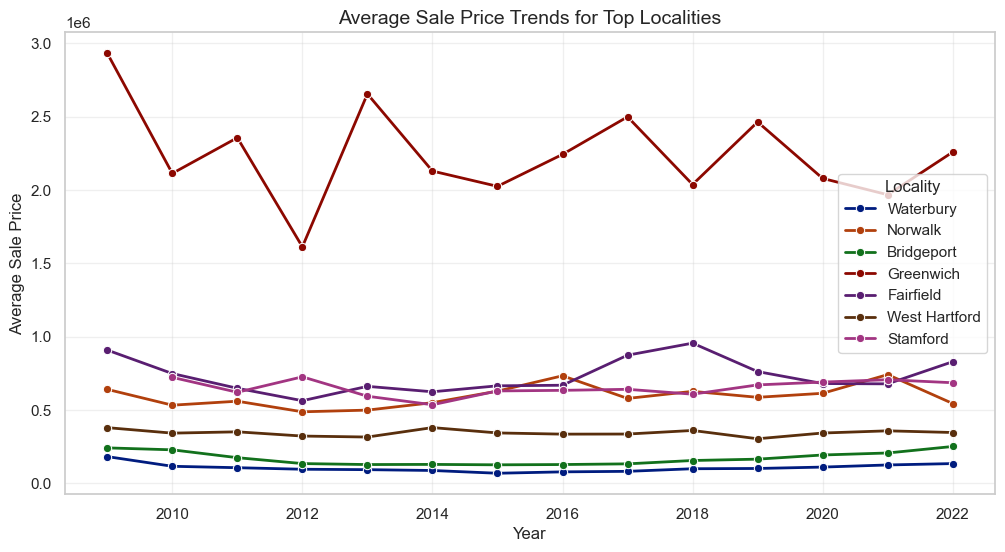

In [113]:
# Top localities by transaction count
top_localities = df['Locality'].value_counts().nlargest(7).index
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df[df['Locality'].isin(top_localities)],
    x='Year',
    y='Sale Price',
    hue='Locality',
    estimator='mean',
    ci=None,
    linewidth=2,
    marker='o'
)
plt.title('Average Sale Price Trends for Top Localities', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.legend(title='Locality')
plt.grid(alpha=0.3)
plt.show()

The line plot illustrates the dominant position of Greenwich in the property market. Greenwich consistently maintains the highest average sale price, fluctuating dramatically between approximately $\$1.6$ million and $\$3.0$ million over the 2009–2022 period, setting it in a completely separate price tier from all other featured localities. Fairfield stands as the next most expensive, with average prices consistently below $\$1.0$ million, showing a generally stable trend with a peak in 2018. The remaining localities (Norwalk, West Hartford, Bridgeport, Waterbury, and Stamford) cluster at the lowest end of the price spectrum, with most of their average sale prices remaining below $\$700,000$ and showing relatively stable, horizontal trends across the entire period, indicating minimal volatility and consistently lower values compared to Greenwich.

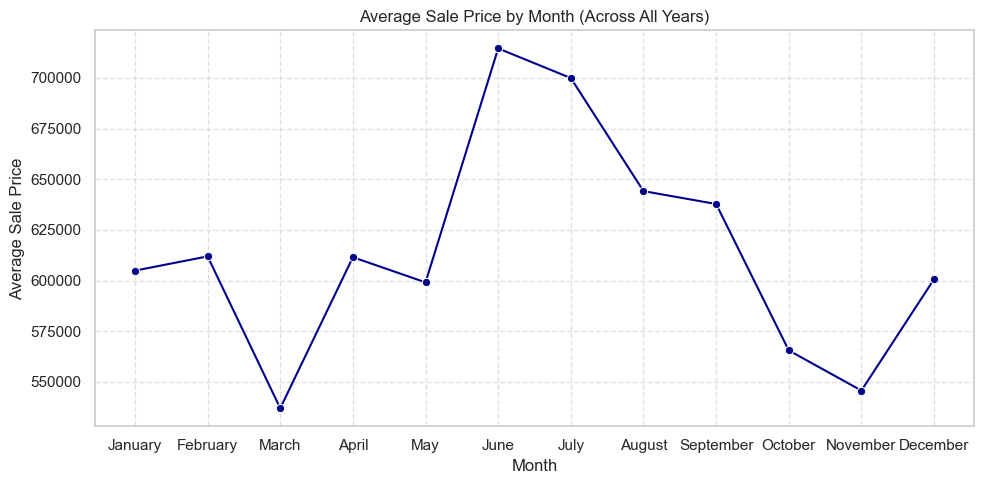

In [114]:
# Average Sale Price by Month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month_name()
from pandas.api.types import CategoricalDtype
monthly_avg = df.groupby('Month')['Sale Price'].mean().reset_index()
month_order = CategoricalDtype([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

monthly_avg['Month'] = monthly_avg['Month'].astype(month_order)
monthly_avg = monthly_avg.sort_values('Month')
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_avg, x='Month', y='Sale Price', marker='o', color='darkblue')
plt.title('Average Sale Price by Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The line plot illustrates the average seasonal trend in the property market. It shows that the average sale price starts moderately high in the winter months (January/February), experiences a sharp and significant dip in March to the lowest point of the year (around $530,000), and then undergoes a strong recovery. The average sale price peaks sharply in the summer months (June/July), reaching the highest point of the year (over $700,000), suggesting properties sold during the peak summer selling season command a premium. Following the summer peak, prices gradually decline through the fall and into the holiday season (October to November/December) before starting a moderate rise again at the start of the new year.

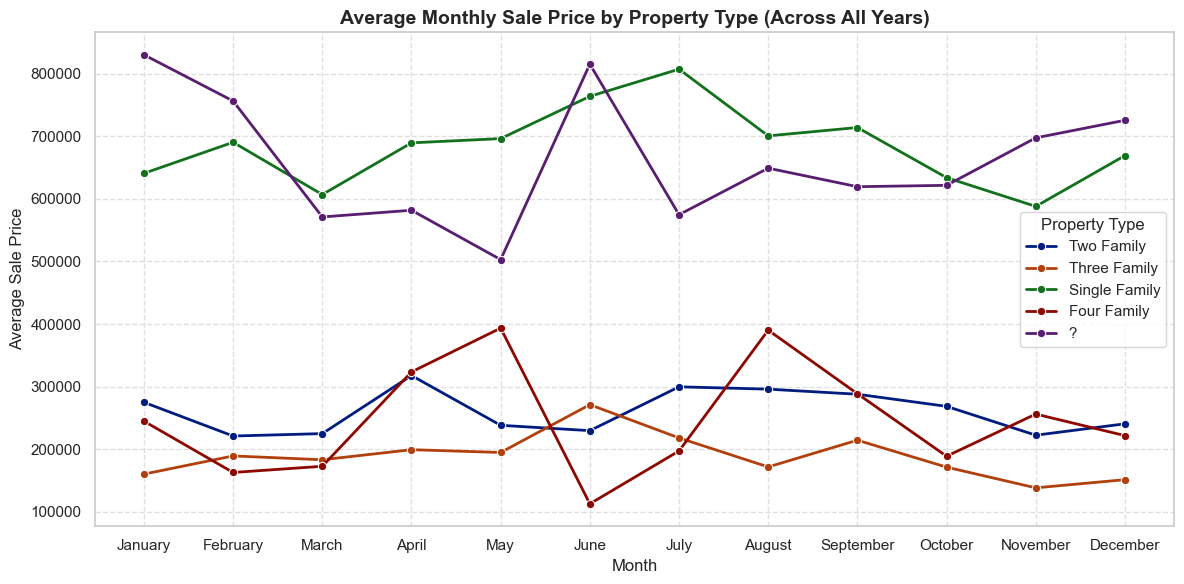

In [115]:
# Average Monthly Sale Price by Property Type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Month'] = df['Date'].dt.month_name()

property_trends = (
    df.groupby(['Month', 'Property'])['Sale Price']
    .mean()
    .reset_index()
)
from pandas.api.types import CategoricalDtype
month_order = CategoricalDtype([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
property_trends['Month'] = property_trends['Month'].astype(month_order)
property_trends = property_trends.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=property_trends,
    x='Month',
    y='Sale Price',
    hue='Property',
    marker='o',
    linewidth=2
)
plt.title('Average Monthly Sale Price by Property Type (Across All Years)', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

The line plot highlights a clear segmentation in the market and distinct seasonal trends for different property categories. Single Family homes consistently command the highest average prices and exhibit a pronounced seasonal peak in the summer (June/July), rising well above $\$750,000$, and a low point in March. The unknown (?) property category generally tracks the Single Family trend but with slightly lower average prices. In contrast, all multi-family property types (Two Family, Three Family, and Four Family) occupy a much lower and tighter price range (mostly below $\$400,000$), but these segments show different seasonal patterns: Two Family and Four Family homes often show spikes in the spring (April/May) and late summer/early fall (August/September), demonstrating that seasonality affects price differently depending on the property type.

Geographical/locality insights

C:\Users\USER\AppData\Local\Temp\ipykernel_11420\1940126951.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


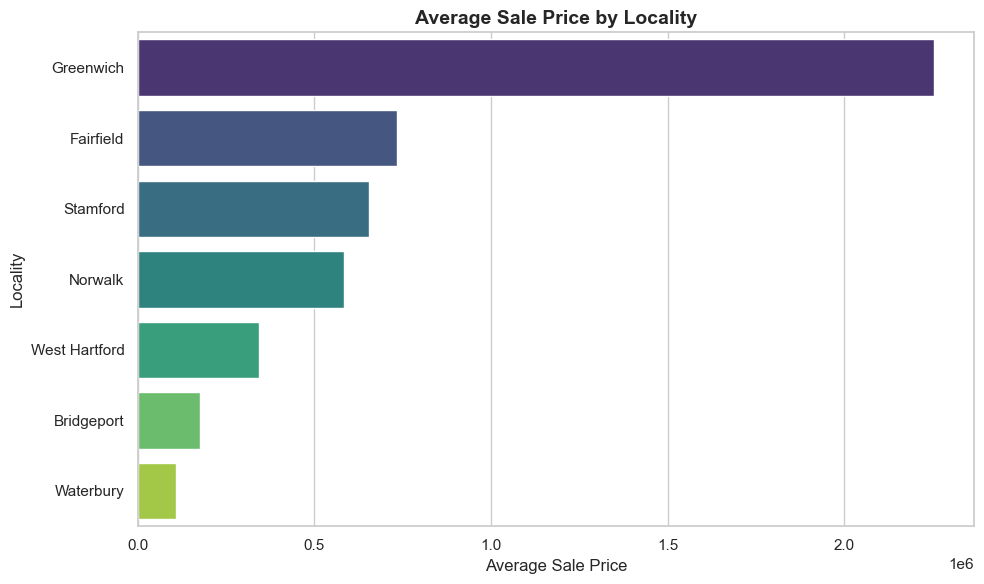

In [116]:
# Average sale price per locality
locality_prices = (
    df.groupby('Locality')['Sale Price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=locality_prices,
    x='Sale Price', 
    y='Locality', 
    palette='viridis'
)
plt.title('Average Sale Price by Locality', fontsize=14, weight='bold')
plt.xlabel('Average Sale Price')
plt.ylabel('Locality')
plt.tight_layout()
plt.show()

The bar chart shows that Greenwich is the most expensive locality by a massive margin, with an average sale price exceeding $\$2.1$ million. This average price is nearly three times that of the next most expensive locality, Fairfield, which has an average price around $\$750,000$. Stamford and Norwalk form the mid-range tier, with averages around $\$650,000$ and $\$550,000$, respectively. The remaining localities—West Hartford, Bridgeport, and Waterbury—cluster at the low end of the market, with average sale prices dropping significantly, particularly for Waterbury, which has the lowest average. This visualization underscores the substantial economic disparity in property values across these localities.

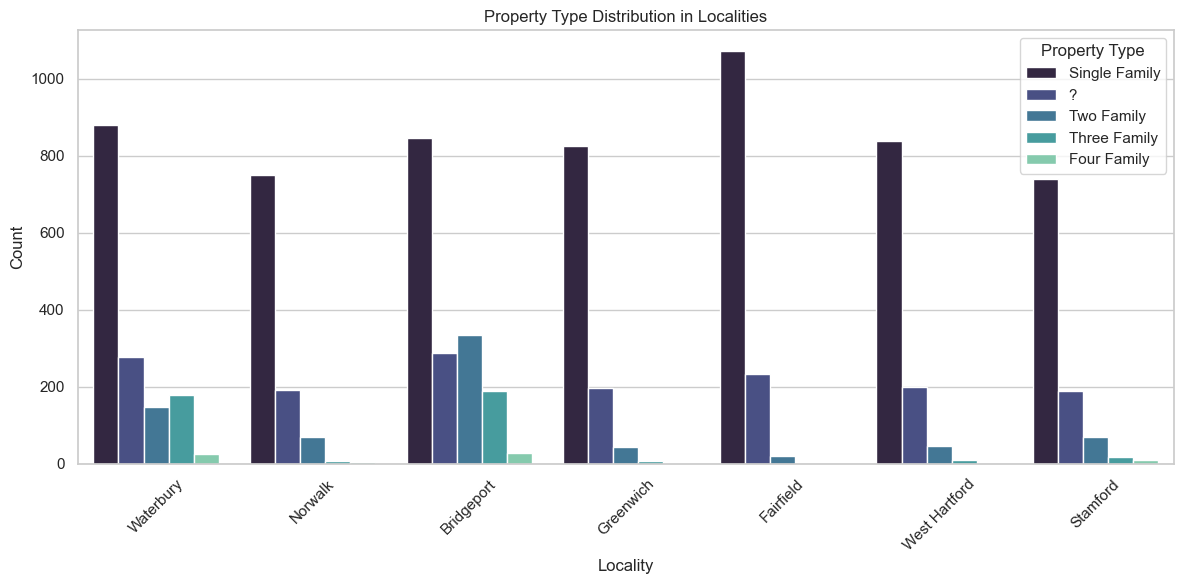

In [117]:
# Property Type Distribution in Localities
plt.figure(figsize=(12,6))
top_10_localities = df['Locality'].value_counts().head(10).index
sns.countplot(
    data=df[df['Locality'].isin(top_10_localities)],
    x='Locality',
    hue='Property',
    palette='mako'
)
plt.title('Property Type Distribution in Localities')
plt.xticks(rotation=45)
plt.xlabel('Locality')
plt.ylabel('Count')
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

The clustered bar chart reveals a strong pattern where Single Family properties dominate the count across all surveyed localities, consistently representing the largest proportion of homes, with a particularly high count in Fairfield (over 1000). The unknown (?) property type is the second most frequent in every locality. Multi-family properties (Two Family, Three Family, and Four Family) are present in much smaller numbers, with Two Family being the most common multi-family type, followed by Three Family and then Four Family (which is barely present in many areas). This distribution confirms that the market is primarily focused on single-family residences across all listed localities.

C:\Users\USER\AppData\Local\Temp\ipykernel_11420\3605567051.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


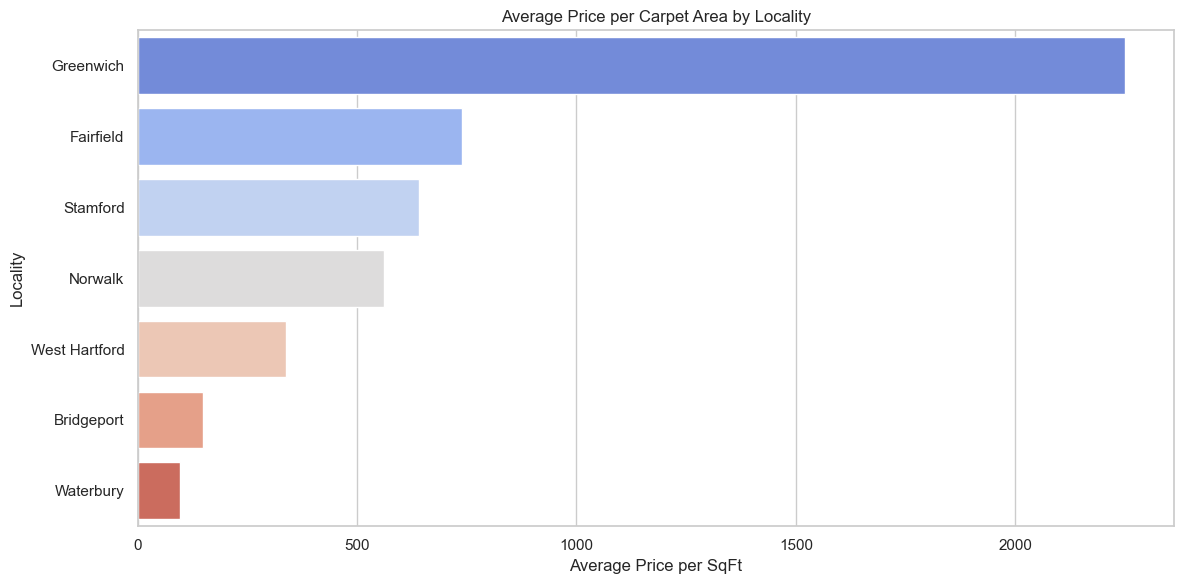

In [118]:
# Average Price per Carpet Area by Locality
df['Price_per_SqFt'] = df['Sale Price'] / df['carpet_area']
locality_area_price = (
    df.groupby('Locality')['Price_per_SqFt']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=locality_area_price,
    x='Price_per_SqFt', y='Locality',
    palette='coolwarm'
)
plt.title('Average Price per Carpet Area by Locality')
plt.xlabel('Average Price per SqFt')
plt.ylabel('Locality')
plt.tight_layout()
plt.show()

The horizontal bar chart demonstrates that Greenwich commands the highest price per unit of carpet area by an enormous margin, with its average price per square foot exceeding $\$2,000$. This average is nearly three times that of the next most expensive locality, Fairfield, which is priced around $\$750$ per square foot, followed closely by Stamford and Norwalk. The localities of West Hartford, Bridgeport, and Waterbury have dramatically lower average prices per square foot, all falling below $\$350$. This visualization reinforces the finding that Greenwich operates in a completely separate and much higher-valued segment of the property market.

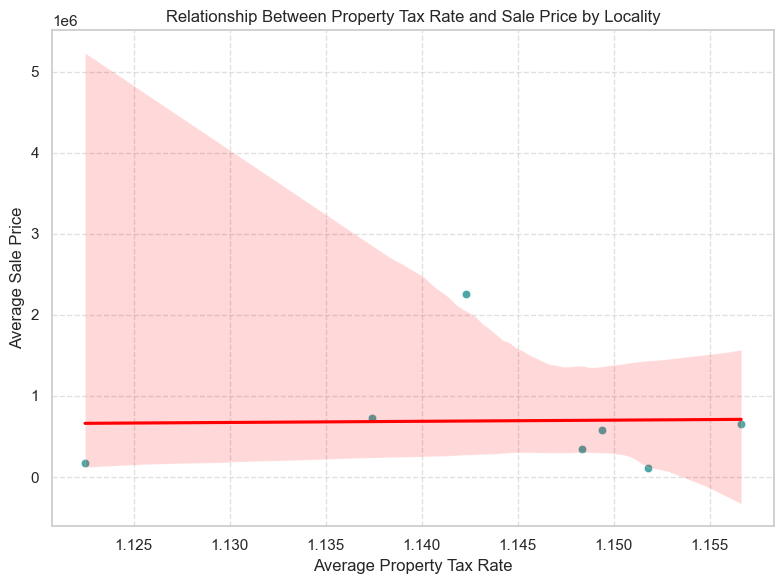

In [119]:
# Relationship Between Property Tax Rate and Sale Price by Locality
tax_price_corr = (
    df.groupby('Locality')[['Sale Price', 'property_tax_rate']]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tax_price_corr,
    x='property_tax_rate',
    y='Sale Price',
    alpha=0.7,
    color='teal'
)
sns.regplot(
    data=tax_price_corr,
    x='property_tax_rate',
    y='Sale Price',
    scatter=False,
    color='red'
)
plt.title('Relationship Between Property Tax Rate and Sale Price by Locality')
plt.xlabel('Average Property Tax Rate')
plt.ylabel('Average Sale Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The scatter plot examines how the average property tax rate relates to the average sale price across different localities. The regression line suggests no overall linear correlation between the average property tax rate and the average sale price across the localities. However, the individual data points (localities) show significant dispersion and are highly influenced by one high-price, mid-tax-rate point, which is responsible for the wide confidence band. The remaining localities fall into a tight cluster of low average sale prices (below $\$750,000$) regardless of their average tax rate, reinforcing the finding that property tax rate is not a significant predictor of property value in this dataset.